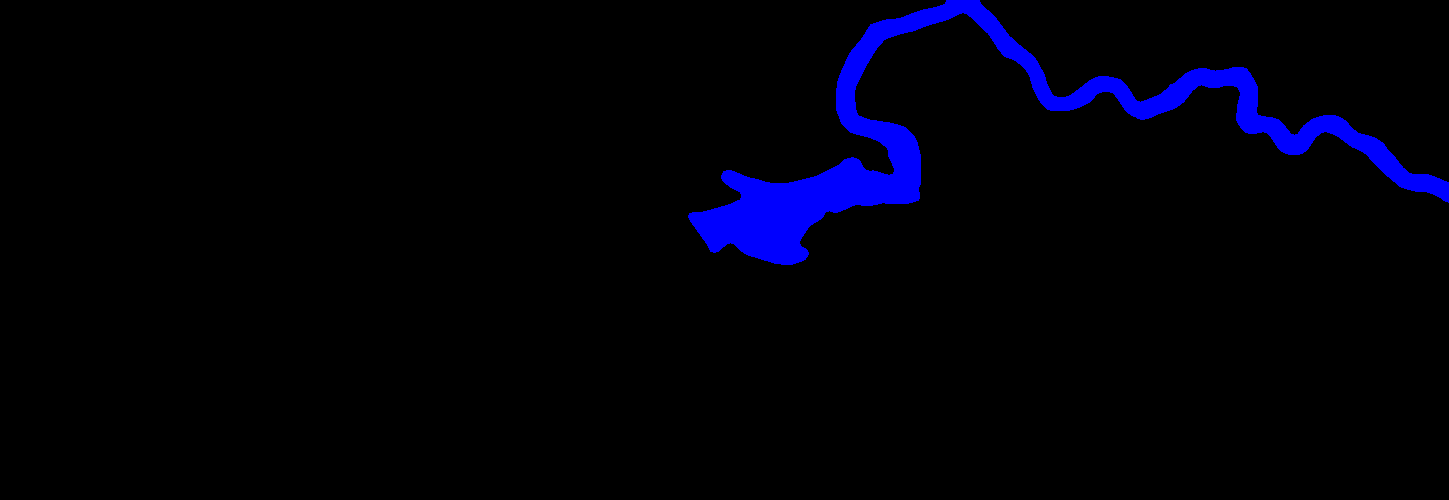

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

image = cv.imread("sample_data/Capture.PNG")

edgedImage = np.zeros_like(image)

for i in range(len(image)):
  for j in range(len(image[i])):
    if image[i][j][0] == 255 and image[i][j][1] == 0 and image[i][j][2] == 0:
      edgedImage[i][j] = [255,255,255]
    else:
      edgedImage[i][j] = [0,0,0]

kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(9,9))
edgedImage = cv.dilate(edgedImage, kernel)
edgedImage = cv.morphologyEx(edgedImage, cv.MORPH_CLOSE, kernel)
edgedImage = cv.cvtColor(edgedImage, cv.COLOR_BGR2GRAY)
contours, hierarchy = cv.findContours(edgedImage.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
edgedImage = cv.cvtColor(edgedImage,cv.COLOR_GRAY2RGB)

for cnt in contours:
  cv.drawContours(edgedImage, contours, 0, (255,0,0), -1)

cv2_imshow(edgedImage)

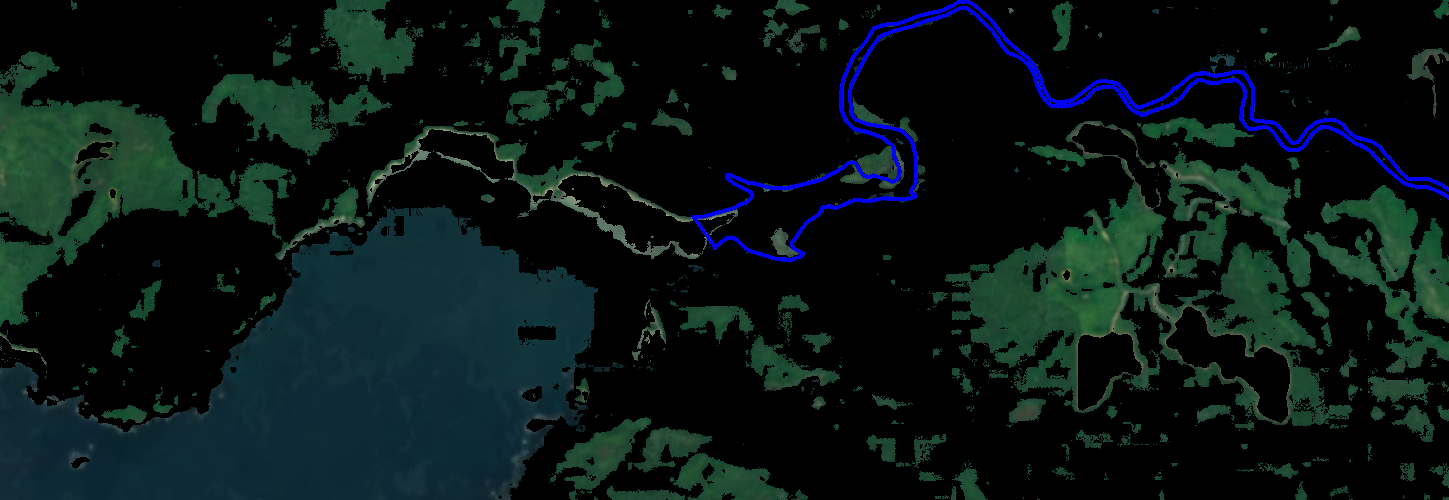

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

image = cv.imread("sample_data/Capture.PNG")

# Convert BGR to HSV
hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)

# define range of blue color in HSV
lower_blue = np.array([94,40,40])
upper_blue = np.array([130,255,255])

# Threshold the HSV image to get only blue colors
mask = cv.inRange(hsv, lower_blue, upper_blue)

# Bitwise-AND mask and original image
res_water = cv.bitwise_and(image, image, mask=mask)

lower_green = np.array([40,40,40])
upper_green = np.array([75,255,255])

mask = cv.inRange(hsv, lower_green, upper_green)

res_grass = cv.bitwise_and(image, image, mask=mask)

res = cv.bitwise_or(res_grass, res_water)

cv2_imshow(res)

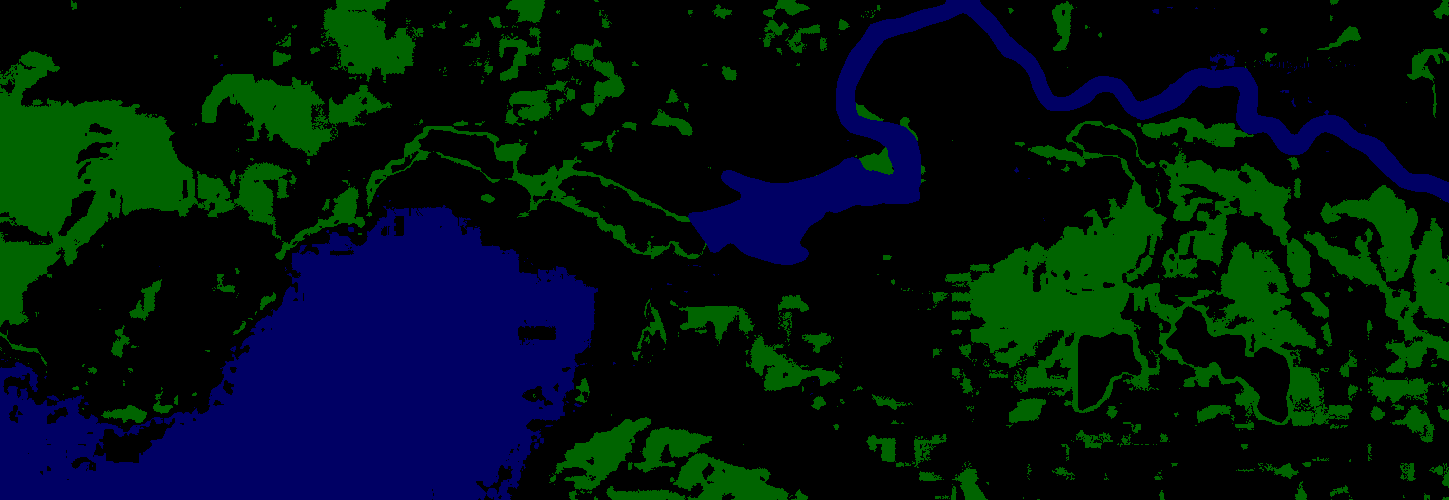

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

def ColorDiff(c1, c2):
  return math.sqrt((c1[0] - c2[0]) ** 2
                    + (c1[1] - c2[1]) ** 2
                    + (c1[2] - c2[2]) ** 2)

def ClosestColor(colors, target):
  min = 2 ** 64 - 1
  closestColor = []
  diff = []
  for color in colors:
    diff = ColorDiff(color, target)
    if min > diff:
      min = diff
      closestColor = color

  return closestColor

def SimplifyColors(bitmap, colorPalette):
  simplifiedImage = np.zeros_like(bitmap)
  for x in range(len(bitmap)):
    for y in range(len(bitmap[x])):
      currentColor = bitmap[x][y]
      simplifiedImage[x][y] = ClosestColor(colorPalette, currentColor)

  return simplifiedImage

image = cv.imread("sample_data/Capture.PNG")

edgedImage = np.zeros_like(image)

for i in range(len(image)):
  for j in range(len(image[i])):
    if image[i][j][0] == 255 and image[i][j][1] == 0 and image[i][j][2] == 0:
      edgedImage[i][j] = [255,255,255]
    else:
      edgedImage[i][j] = [0,0,0]

kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(9,9))
edgedImage = cv.dilate(edgedImage, kernel)
edgedImage = cv.morphologyEx(edgedImage, cv.MORPH_CLOSE, kernel)
edgedImage = cv.cvtColor(edgedImage, cv.COLOR_BGR2GRAY)
contours, hierarchy = cv.findContours(edgedImage.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
edgedImage = cv.cvtColor(edgedImage,cv.COLOR_GRAY2RGB)

for cnt in contours:
  cv.drawContours(edgedImage, contours, 0, (255,0,0), -1)

hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)

lower_blue = np.array([94,40,40])
upper_blue = np.array([130,255,255])
lower_green = np.array([40,40,40])
upper_green = np.array([75,255,255])

mask = cv.inRange(hsv, lower_blue, upper_blue)

res_water = cv.bitwise_and(image, image, mask=mask)

mask = cv.inRange(hsv, lower_green, upper_green)

res_grass = cv.bitwise_and(image, image, mask=mask)

res = cv.bitwise_or(res_grass, res_water)
res = cv.bitwise_or(res, edgedImage)

colorPalette = [[100,0,0], [0,100,0], [0,0,0]]
res = SimplifyColors(res, colorPalette)

cv2_imshow(res)